# BL40A2020 Wireless Communication Systems

## Assignment  week 3: Digital modulation

## Author: Eero Suomalainen

### Follow the steps done in the [notes](https://github.com/pedrohjn/wireless-comm/blob/master/Week%203/week3.ipynb) to analyze the *[8PSK](https://komm.readthedocs.io/en/latest/komm.PSKModulation/)* modulation

**1. Signal constelation**

In [1]:
! pip install scikit-dsp-comm
! pip install komm
! pip install sympy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 61.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.1/38.1 MB 32.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 79.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 89.1 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 77.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for komm: filename=komm-0.7.1-py3-none-any.whl size=56590 sha256=883836be55506bc555714580c86086a676df301d8b9090f1f54d0a1263138150
  Stored in directory: /home/jovyan/.cache/pip/wheels/67/d6/14/a8e4b0235b3dc3c8a28c4e2059b66ad5b8c262df15df54f843
Successfully built ko

In [3]:
import math
import komm
import sympy as sp
sp.init_printing() 
import sk_dsp_comm.sigsys as ss
import scipy.signal as signal
import scipy.fftpack as fftpack
import scipy.interpolate as interp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
import warnings
warnings.filterwarnings('ignore')

In [48]:
a = 1
psk = komm.PSKModulation(2, phase_offset=a)

In [49]:
psk.constellation

array([ 0.54030231+0.84147098j, -0.54030231-0.84147098j])

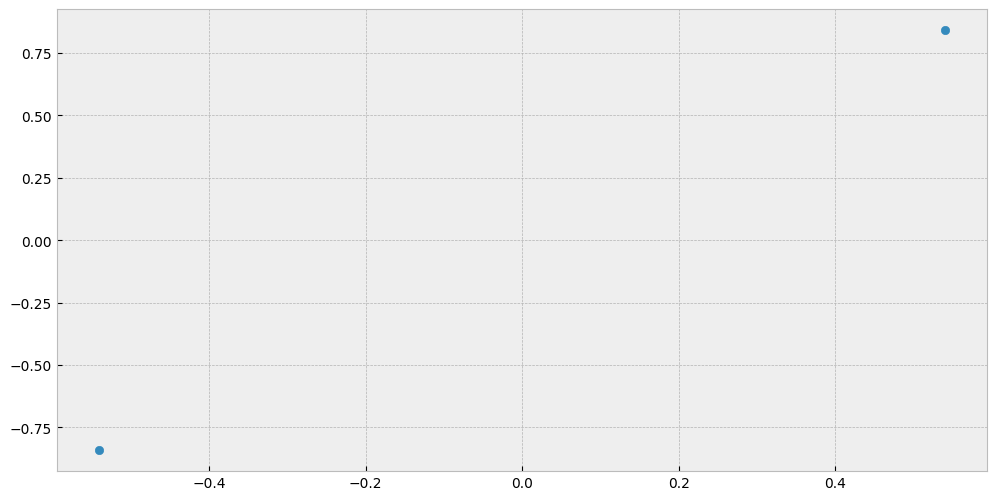

In [50]:
plt.rcParams['figure.figsize'] = 12, 6
plt.scatter(psk.constellation.real,psk.constellation.imag);

**2. Numerical example:** Assume the following equation:

$$u_\mathrm{p}(t) = u_\mathrm{c}(t)\cos(2\pi 1000 t) - u_\mathrm{s}(t)\sin(2\pi 1000 t)$$

Plot the wave form for a random binary sequence of $12$ bits considering an information rate of 300 bits per second.

In [51]:
input_seq_size = 12
tp = np.arange(0, input_seq_size , 1) # time / period = 1 bit per period
input_seq = np.random.randint(2, size=input_seq_size)
print("Input sequence:", input_seq)
print("Length:", len(input_seq))

Input sequence: [0 0 0 1 1 0 0 0 0 0 0 0]
Length: 12


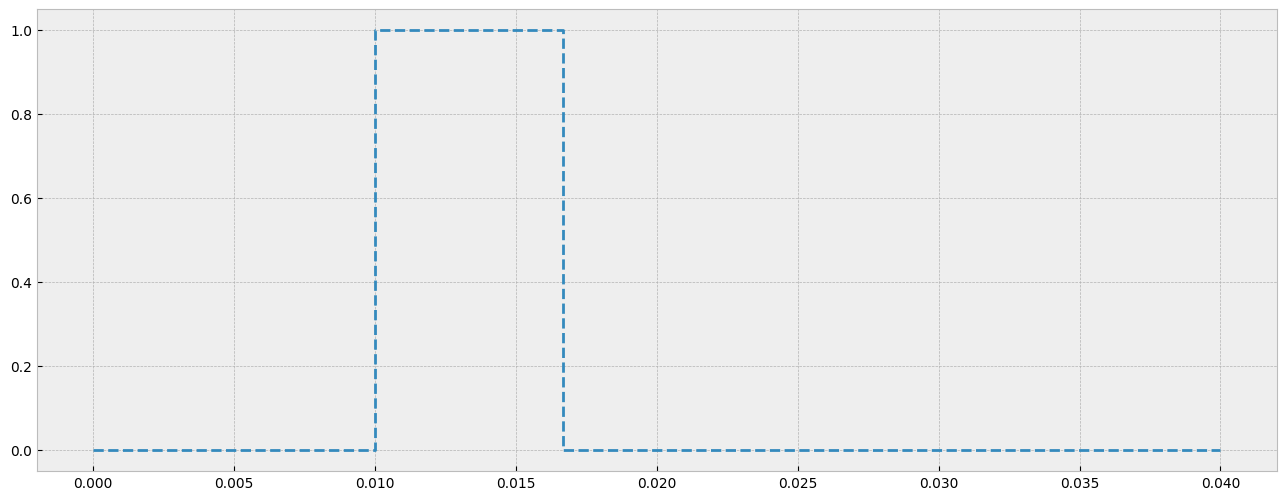

In [52]:
input_rate = 300
plt.rcParams['figure.figsize'] = 16, 6
input_seq_plot = np.append(input_seq,input_seq[input_seq_size-1])
tp_plot = np.append(tp,tp[input_seq_size-1]+1)/input_rate #Need to convert this to seconds
plt.step(tp_plot ,input_seq_plot,where='post',linestyle='--');

Input sequence: [0 0 0 1 1 0 0 0 0 0 0 0]
Modulating sequence: [ 0.54030231+0.84147098j  0.54030231+0.84147098j  0.54030231+0.84147098j
 -0.54030231-0.84147098j -0.54030231-0.84147098j  0.54030231+0.84147098j
  0.54030231+0.84147098j  0.54030231+0.84147098j  0.54030231+0.84147098j
  0.54030231+0.84147098j  0.54030231+0.84147098j  0.54030231+0.84147098j]


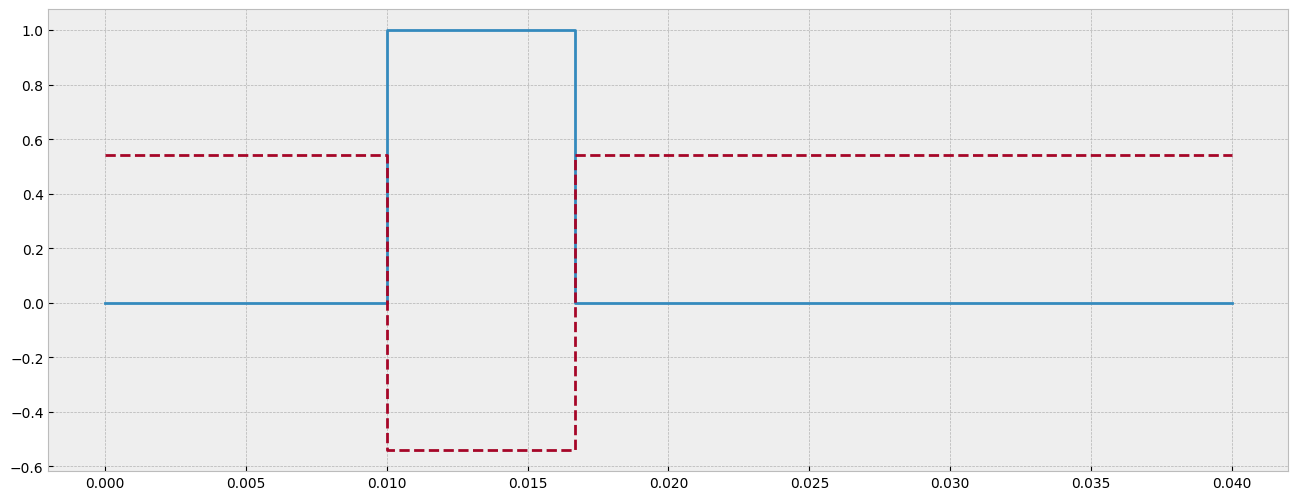

In [53]:
print("Input sequence:", input_seq)
print("Modulating sequence:", psk.modulate(input_seq))
plt.step(tp_plot,input_seq_plot,where='post')
plt.step(tp_plot,psk.modulate(input_seq_plot),where='post',linestyle='--')
plt.show()

In [75]:
t,fc = sp.symbols('t,f_c')
psk_wave = sp.cos(2*sp.pi*fc*t)
psk_wave

In [76]:
freq_c = 1000
psk_modulation = sp.lambdify(t,psk_wave.subs(fc,freq_c),"numpy")

In [77]:
tmod_points = 100*input_seq_size
tmod = np.linspace(0, tp_plot[input_seq_size], tmod_points)
input_wave_aux = psk.modulate(input_seq)
input_wave_I_aux = input_wave_aux.real
input_wave_I = np.zeros(tmod_points)
##################################
for i in range(0, tmod_points):
    aux = math.floor(i/100)
    if input_wave_I_aux[aux] > 0: 
        input_wave_I[i] = a
    else:
        input_wave_I[i] = -a

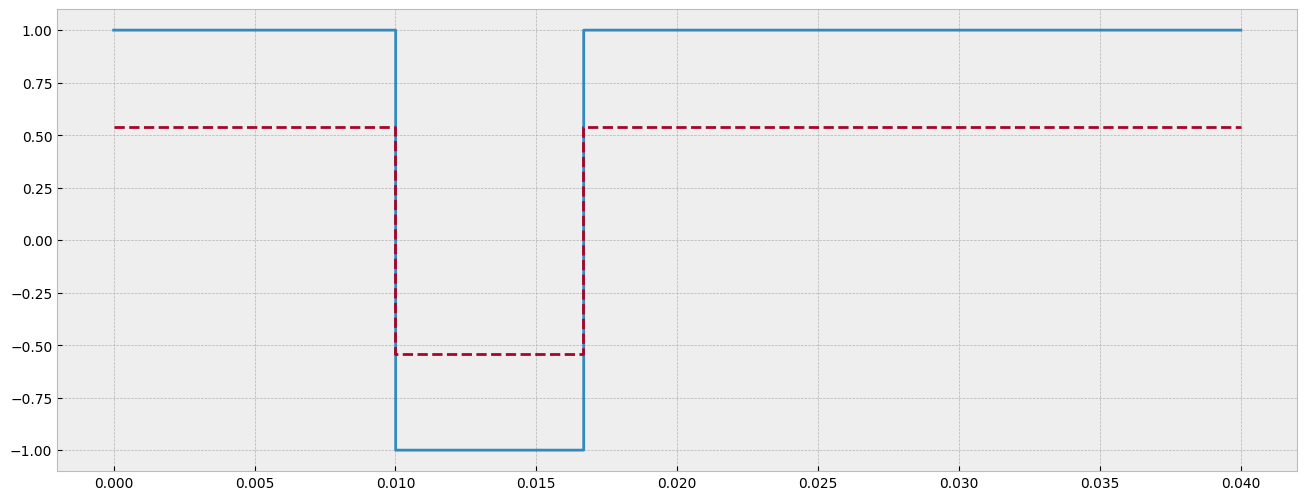

In [78]:
plt.step(tmod,input_wave_I,where='post')
plt.step(tp_plot,psk.modulate(input_seq_plot),linestyle='--',where='post')
plt.show()

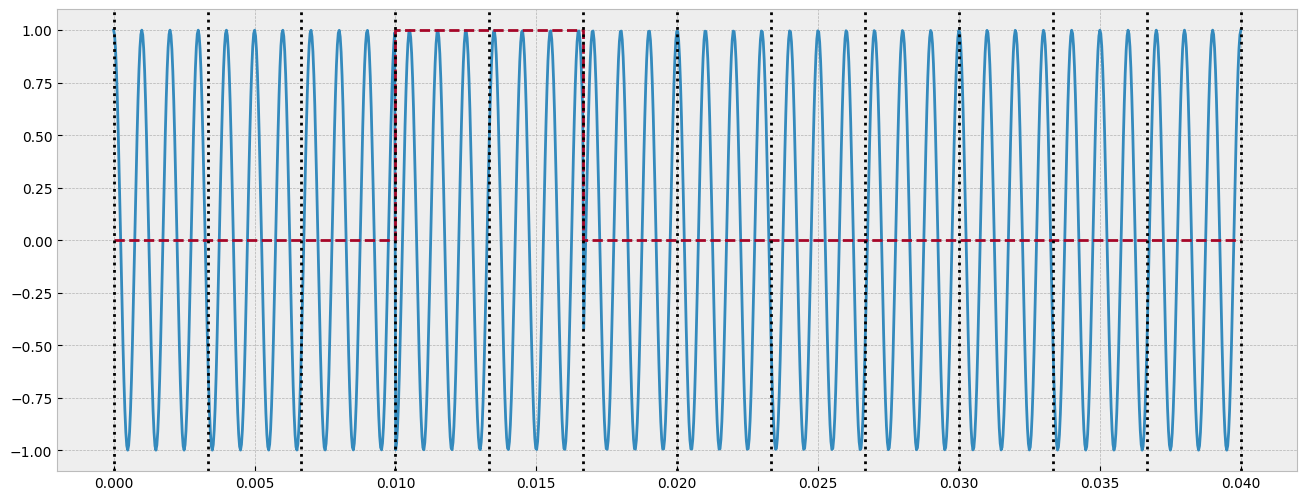

In [79]:
plt.plot(tmod,input_wave_I*psk_modulation(tmod))
plt.step(tp_plot ,input_seq_plot,where='post',linestyle='--')
for i in range(input_seq_size + 1):
    plt.axvline(i/input_rate,linestyle=':',color='k');
plt.show()

**3. Compute analytically the 99% and 90% power-containment bandwidths and test it with numerical results**

In [81]:
uc = sp.cos(2*sp.pi*fc*t)
us = sp.sin(2*sp.pi*fc*t)

In [82]:
freq_c = 1000
modulation_I = sp.lambdify(t,uc.subs(fc,freq_c),"numpy")
modulation_Q = sp.lambdify(t,us.subs(fc,freq_c),"numpy")

In [85]:
#We need to normalize the values by the number of samples per second.
X = fftpack.fft(input_wave_I*modulation_I(tmod) - input_wave_I*modulation_Q(tmod)) / (tmod_points/tp_plot[input_seq_size])
#To get the frequency, we need to match the number of points of XinI and then normalize by the number of samples per second.
freq = fftpack.fftfreq(len(input_wave_I*modulation_I(tmod) - input_wave_I*modulation_Q(tmod))) * tmod_points/tp_plot[input_seq_size]
#Using this fftshift, we can arrange the output array to make the plot.
X = fftpack.fftshift(X)
freq = fftpack.fftshift(freq)
absX = np.abs(X) 

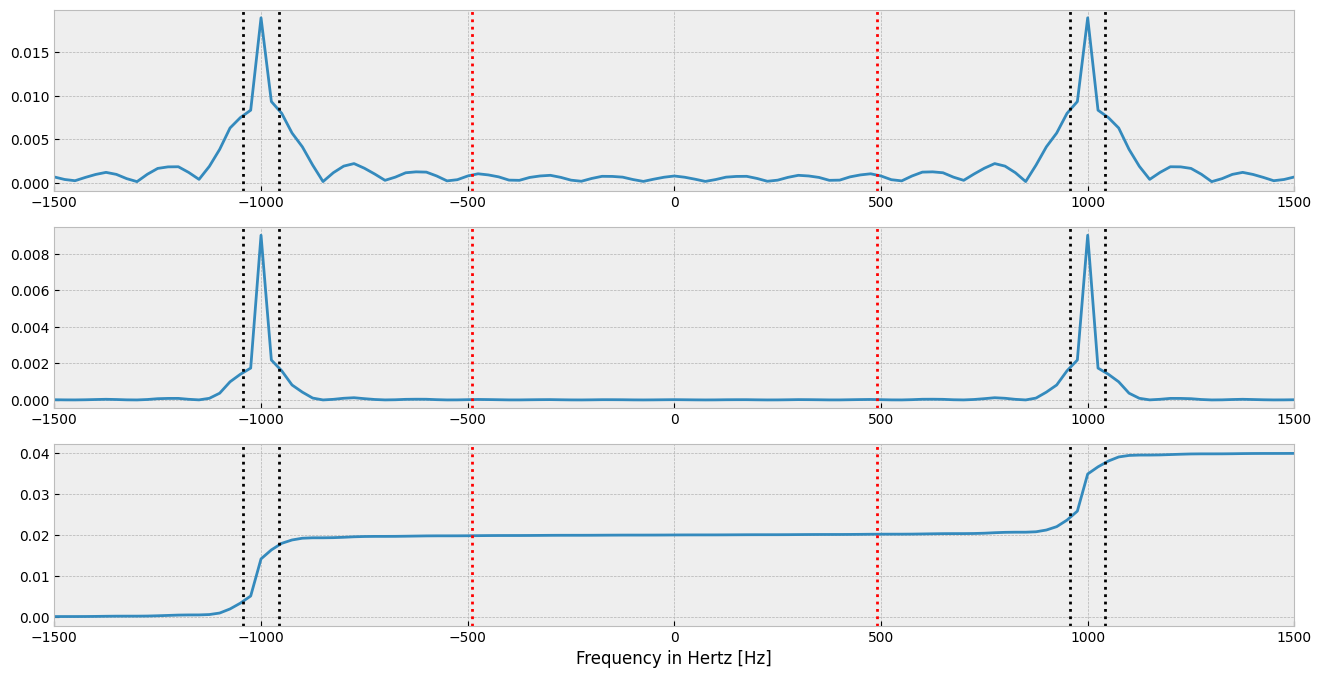

In [86]:
plt.rcParams['figure.figsize'] = 16, 8
ax = plt.subplot(311)
ax.plot(freq,absX)
ax.axvline(freq_c-85/2,linestyle=':',color='k')
ax.axvline(freq_c+85/2,linestyle=':',color='k')
ax.axvline(freq_c-510,linestyle=':',color='r')
ax.axvline(freq_c+510,linestyle=':',color='r')
ax.axvline(-freq_c-85/2,linestyle=':',color='k')
ax.axvline(-freq_c+85/2,linestyle=':',color='k')
ax.axvline(-freq_c-510,linestyle=':',color='r')
ax.axvline(-freq_c+510,linestyle=':',color='r')
ax.set_xlim(-1500, 1500);
ax1 = plt.subplot(312)
ax1.plot(freq,absX**2 / tp_plot[input_seq_size])
ax1.axvline(freq_c-85/2,linestyle=':',color='k')
ax1.axvline(freq_c+85/2,linestyle=':',color='k')
ax1.axvline(freq_c-510,linestyle=':',color='r')
ax1.axvline(freq_c+510,linestyle=':',color='r')
ax1.axvline(-freq_c-85/2,linestyle=':',color='k')
ax1.axvline(-freq_c+85/2,linestyle=':',color='k')
ax1.axvline(-freq_c-510,linestyle=':',color='r')
ax1.axvline(-freq_c+510,linestyle=':',color='r')
ax1.set_xlim(-1500, 1500);
ax2 = plt.subplot(313)
ax2.plot(freq,np.cumsum(absX**2 /tp_plot[input_seq_size]))
ax2.axvline(freq_c-85/2,linestyle=':',color='k')
ax2.axvline(freq_c+85/2,linestyle=':',color='k')
ax2.axvline(freq_c-510,linestyle=':',color='r')
ax2.axvline(freq_c+510,linestyle=':',color='r')
ax2.axvline(-freq_c-85/2,linestyle=':',color='k')
ax2.axvline(-freq_c+85/2,linestyle=':',color='k')
ax2.axvline(-freq_c-510,linestyle=':',color='r')
ax2.axvline(-freq_c+510,linestyle=':',color='r')
ax2.set_xlabel('Frequency in Hertz [Hz]')
ax2.set_xlim(-1500, 1500);

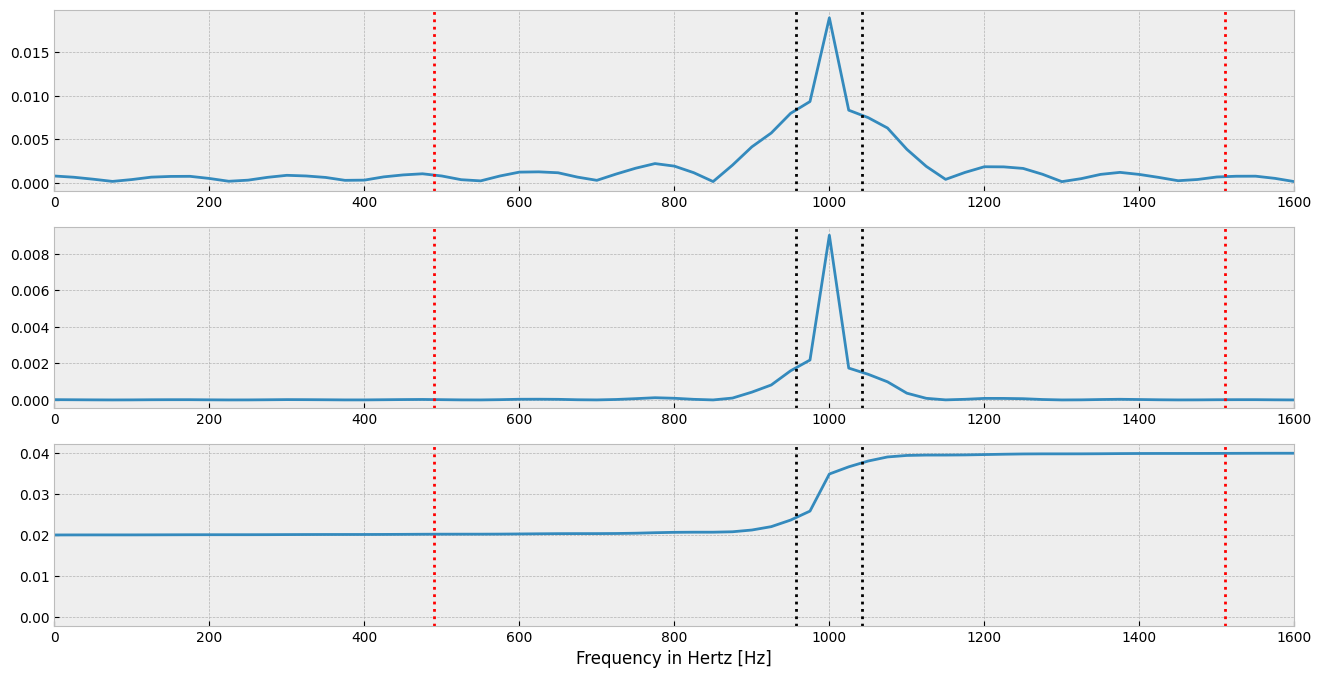

In [87]:
plt.rcParams['figure.figsize'] = 16, 8
ax = plt.subplot(311)
ax.plot(freq,absX)
ax.axvline(freq_c-85/2,linestyle=':',color='k')
ax.axvline(freq_c+85/2,linestyle=':',color='k')
ax.axvline(freq_c-510,linestyle=':',color='r')
ax.axvline(freq_c+510,linestyle=':',color='r')
ax.set_xlim(0, freq_c+600);
ax1 = plt.subplot(312)
ax1.plot(freq,absX**2 / tp_plot[input_seq_size])
ax1.axvline(freq_c-85/2,linestyle=':',color='k')
ax1.axvline(freq_c+85/2,linestyle=':',color='k')
ax1.axvline(freq_c-510,linestyle=':',color='r')
ax1.axvline(freq_c+510,linestyle=':',color='r')
ax1.set_xlim(0, freq_c+600);
ax2 = plt.subplot(313)
ax2.plot(freq,np.cumsum(absX**2 /tp_plot[input_seq_size]))
ax2.axvline(freq_c-85/2,linestyle=':',color='k')
ax2.axvline(freq_c+85/2,linestyle=':',color='k')
ax2.axvline(freq_c-510,linestyle=':',color='r')
ax2.axvline(freq_c+510,linestyle=':',color='r')
ax2.set_xlabel('Frequency in Hertz [Hz]')
ax2.set_xlim(0, freq_c+600);